## 1️⃣ Import des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2️⃣ Chargement du dataset

In [7]:
df_sto = pd.read_csv('../data/df_mm_stores_details.csv')


In [5]:
# Création d'une copie du DataFrame 
df_sto_copy = df_sto.copy()  # pour garder une version originale intacte
df_sto_copy.head()

,Quarter,StoreId,State,Position,Market,ProdId,Product,Type,ReportId
0,NaN,Los Angeles - Sunset Boulevard,California,West,Large Market,1_Co,Amaretto,Coffee,JB578CJ
1,2023-04-01,Los Angeles - Sunset Boulevard,California,West,Large Market,NaN,Amaretto,Coffee,UZ650HV
2,2023-07-01,Los Angeles - Sunset Boulevard,California,West,Large Market,1_Co,Amaretto,Coffee,VB278N7
3,2023-10-01,Los Angeles - Sunset Boulevard,California,West,Large Market,1_Co,Amaretto,Coffee,TL8282Y
4,2023-01-01,Los Angeles - Hollywood Boulevard,California,West,Large Market,1_Co,Amaretto,Coffee,FB512II


In [8]:
# Aperçu rapide
print("Dimensions :", df_sto.shape)
df_sto.head()

Dimensions : (33856, 9)


,Quarter,StoreId,State,Position,Market,ProdId,Product,Type,ReportId
0,NaN,Los Angeles - Sunset Boulevard,California,West,Large Market,1_Co,Amaretto,Coffee,JB578CJ
1,2023-04-01,Los Angeles - Sunset Boulevard,California,West,Large Market,NaN,Amaretto,Coffee,UZ650HV
2,2023-07-01,Los Angeles - Sunset Boulevard,California,West,Large Market,1_Co,Amaretto,Coffee,VB278N7
3,2023-10-01,Los Angeles - Sunset Boulevard,California,West,Large Market,1_Co,Amaretto,Coffee,TL8282Y
4,2023-01-01,Los Angeles - Hollywood Boulevard,California,West,Large Market,1_Co,Amaretto,Coffee,FB512II


In [9]:
# Statistiques descriptives
df_sto.info()
df_sto.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33856 entries, 0 to 33855
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Quarter   32680 non-null  object
 1   StoreId   32343 non-null  object
 2   State     33189 non-null  object
 3   Position  32713 non-null  object
 4   Market    31789 non-null  object
 5   ProdId    32104 non-null  object
 6   Product   30761 non-null  object
 7   Type      31021 non-null  object
 8   ReportId  33856 non-null  object
dtypes: object(9)
memory usage: 2.3+ MB


,Quarter,StoreId,State,Position,Market,ProdId,Product,Type,ReportId
count,32680,32343,33189,32713,31789,32104,30761,31021,33856
unique,4,795,20,4,3,13,13,2,33855
top,2023-04-01,Wilsonville - SW Wilsonville Road,Utah,West,Medium Market,10_Te,Caffe Mocha,Coffee,LL99883
freq,8173,52,2247,12278,15109,2630,2521,16416,2


In [10]:
# aperçu global
df_sto.sample(5)

,Quarter,StoreId,State,Position,Market,ProdId,Product,Type,ReportId
9394,2023-07-01,Reynoldsburg - Main Street,Ohio,East,Medium Market,5_Te,Chamomile,Tea,DY475CF
12520,2023-01-01,Plano - Legacy Drive,Texas,South,Large Market,3_Co,Columbian,Coffee,SS090XQ
33036,2023-01-01,Canton - Market Avenue,Ohio,East,Medium Market,12_Co,Regular Espresso,Coffee,TT318I7
31033,2023-04-01,Riverton - 13400 South,Utah,West,Small Market,2_Te,Mint,Tea,OP4189D
31674,2023-07-01,Brighton - Historic Downtown Brighton,Colorado,West,Medium Market,12_Co,Regular Espresso,Coffee,XG401M7


## 3️⃣ Analyse structurelle

In [11]:
# Structure & types
print("== Info ==")
df_sto.info()
print("\n== Dtypes ==")
print(df_sto.dtypes)


== Info ==
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33856 entries, 0 to 33855
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Quarter   32680 non-null  object
 1   StoreId   32343 non-null  object
 2   State     33189 non-null  object
 3   Position  32713 non-null  object
 4   Market    31789 non-null  object
 5   ProdId    32104 non-null  object
 6   Product   30761 non-null  object
 7   Type      31021 non-null  object
 8   ReportId  33856 non-null  object
dtypes: object(9)
memory usage: 2.3+ MB

== Dtypes ==
Quarter     object
StoreId     object
State       object
Position    object
Market      object
ProdId      object
Product     object
Type        object
ReportId    object
dtype: object


In [12]:
#  Valeurs manquantes (nombre & %)
missing_tbl = pd.DataFrame({
    "missing_count": df_sto.isna().sum(),
    "missing_pct": (df_sto.isna().mean()*100).round(2)
}).sort_values("missing_pct", ascending=False)
print("\n== Valeurs manquantes (Top) ==")
display(missing_tbl.head(10))


== Valeurs manquantes (Top) ==


,missing_count,missing_pct
Product,3095,9.14
Type,2835,8.37
Market,2067,6.11
ProdId,1752,5.17
StoreId,1513,4.47
Quarter,1176,3.47
Position,1143,3.38
State,667,1.97
ReportId,0,0.00


In [13]:
#Doublons (lignes entières)
print("Doublons (toutes colonnes) :", df_sto.duplicated().sum())

Doublons (toutes colonnes) : 0


In [14]:
#  Clé de jointure (on teste les candidates usuelles)
candidates = [c for c in ["ReportId","reportid","StoreId","storeid","id"] if c in df_sto.columns]
print("Candidats clé :", candidates)

Candidats clé : ['ReportId', 'StoreId']


In [ ]:
# Clé de jointure 
candidates = [c for c in ["ReportId","reportid","StoreId","storeid","id"] if c in df_sto.columns]
print("Candidats clé :", candidates)

key = None
for c in ["reportid","ReportId","storeid","StoreId","id"]:
    if c in df_sto.columns:
        key = c
        break

print("Clé retenue :", key)
if key:
    print("NA sur clé :", df_sto[key].isna().sum())
    print("Doublons sur clé :", df_sto[key].duplicated().sum())

Candidats clé : ['ReportId', 'StoreId']
Clé retenue : ReportId
NA sur clé : 0
Doublons sur clé : 1


In [16]:
# Aperçu stats numériques
print("\n== describe() numérique ==")
display(df_sto.describe().T)


== describe() numérique ==


,count,unique,top,freq
Quarter,32680,4,2023-04-01,8173
StoreId,32343,795,Wilsonville - SW Wilsonville Road,52
State,33189,20,Utah,2247
Position,32713,4,West,12278
Market,31789,3,Medium Market,15109
ProdId,32104,13,10_Te,2630
Product,30761,13,Caffe Mocha,2521
Type,31021,2,Coffee,16416
ReportId,33856,33855,LL99883,2


## 4️⃣ Nettoyage des colonnes


In [18]:
# Fonction de nettoyage des noms de colonnes
def to_sup(c):
    return (
        c.strip()
         .replace(" ", "_")
         .replace("-", "_")
         .replace("/", "_")
         .replace("%", "pct")
         .lower()
    )

old_cols = df_sto.columns.tolist()
df_sto.columns = [to_sup(c) for c in df_sto.columns]

print("✔ Colonnes renommées :")
for o, n in zip(old_cols, df_sto.columns):
    if o != n:
        print(f"{o}  →  {n}")


✔ Colonnes renommées :
Quarter  →  quarter
StoreId  →  storeid
State  →  state
Position  →  position
Market  →  market
ProdId  →  prodid
Product  →  product
Type  →  type
ReportId  →  reportid


In [19]:
# Suppression du doublon clé
before = df_sto.shape[0]
df_sto = df_sto.drop_duplicates(subset="reportid", keep="first")
after = df_sto.shape[0]

print(f"Lignes supprimées : {before - after}")

Lignes supprimées : 1


In [20]:
df_sto.isna().sum().sort_values(ascending=False)
# Vérifier s’il reste des doublons de noms de colonnes

product     3095
type        2834
market      2067
prodid      1752
storeid     1513
quarter     1176
position    1143
state        667
reportid       0
dtype: int64

In [21]:
# Création d'une copie finale du dataset nettoyé
df_sto_clean = df_sto.copy()

print("✅ Copie propre créée : df_sto_clean")
print("Dimensions :", df_sto_clean.shape)



✅ Copie propre créée : df_sto_clean
Dimensions : (33855, 9)


## 5️⃣ Analyse univariée

In [22]:

# Statistiques descriptives globales
stats = df_sto_clean.describe(include='all').T
display(stats)


,count,unique,top,freq
quarter,32679,4,2023-04-01,8173
storeid,32342,795,Wilsonville - SW Wilsonville Road,52
state,33188,20,Utah,2247
position,32712,4,West,12278
market,31788,3,Medium Market,15109
prodid,32103,13,10_Te,2630
product,30760,13,Caffe Mocha,2521
type,31021,2,Coffee,16416
reportid,33855,33855,JB578CJ,1


In [23]:
# Distribution des variables principales
cols_to_plot = ["state", "market", "type", "product", "position"]

for c in cols_to_plot:
    print(f"\n=== {c.upper()} ===")
    display(df_sto_clean[c].value_counts().head(10))



=== STATE ===


state
Utah          2247
California    2241
Nevada        2125
Oregon        2061
Colorado      2012
Washington    1779
Missouri      1710
Iowa          1685
Wisconsin     1677
Ohio          1671
Name: count, dtype: int64


=== MARKET ===


market
Medium Market    15109
Small Market     11771
Large Market      4908
Name: count, dtype: int64


=== TYPE ===


type
Coffee    16416
Tea       14605
Name: count, dtype: int64


=== PRODUCT ===


product
Caffe Mocha          2521
Lemon                2509
Darjeeling           2480
Chamomile            2453
Earl Grey            2435
Columbian            2415
Green Tea            2366
Decaf Irish Cream    2360
Decaf Espresso       2353
Mint                 2271
Name: count, dtype: int64


=== POSITION ===


position
West       12278
East        6978
South       6849
Central     6607
Name: count, dtype: int64

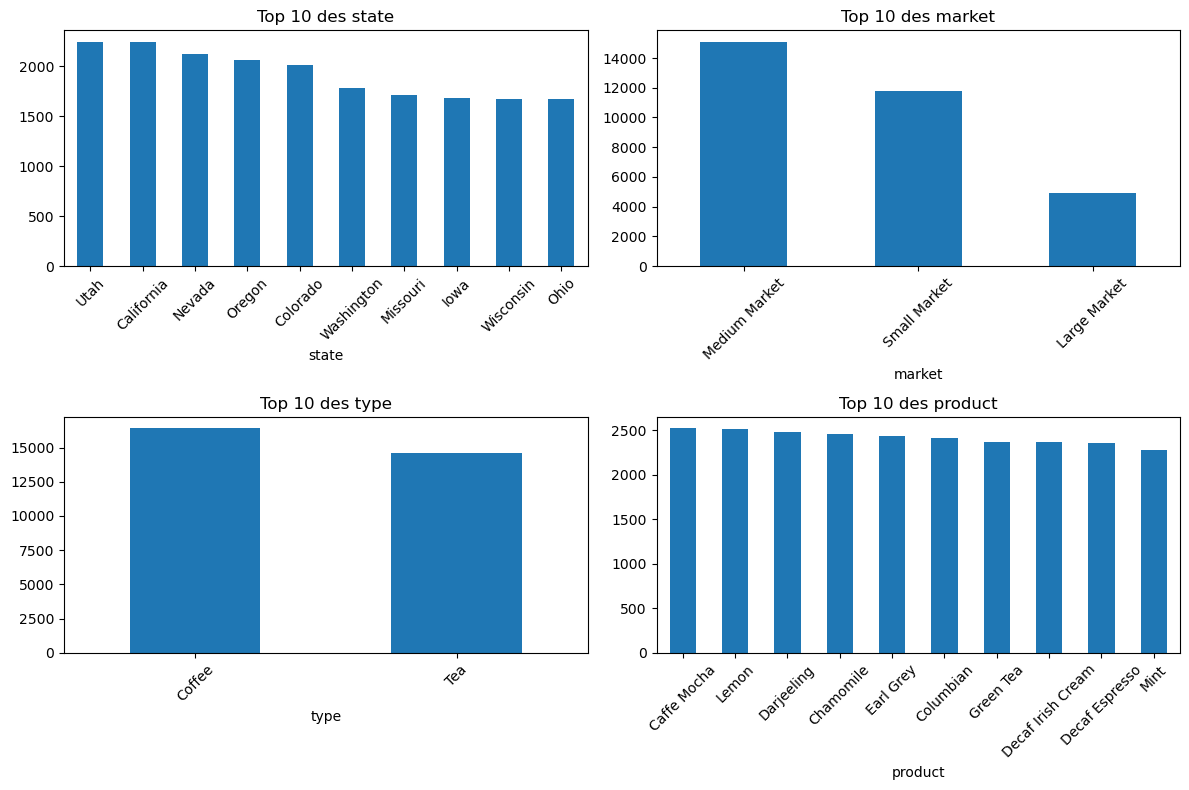

In [24]:
# Histogrammes des variables catégorielles principales
plt.figure(figsize=(12, 8))
for i, c in enumerate(cols_to_plot[:4], 1):
    plt.subplot(2, 2, i)
    df_sto_clean[c].value_counts().head(10).plot(kind='bar')
    plt.title(f"Top 10 des {c}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


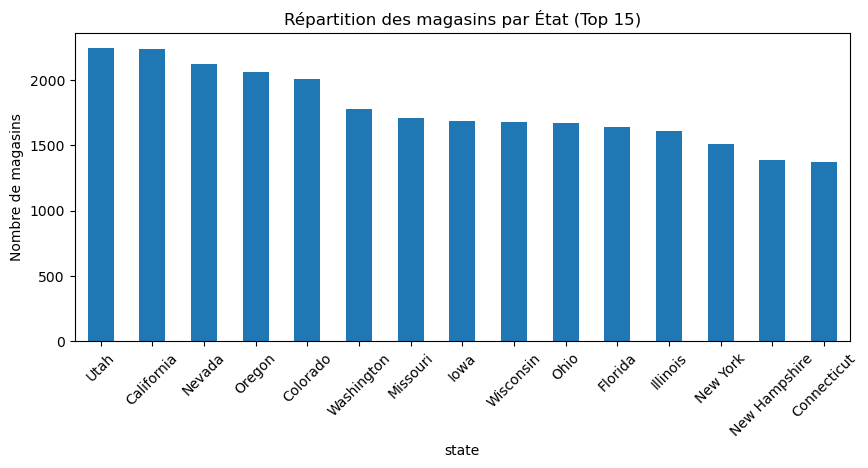

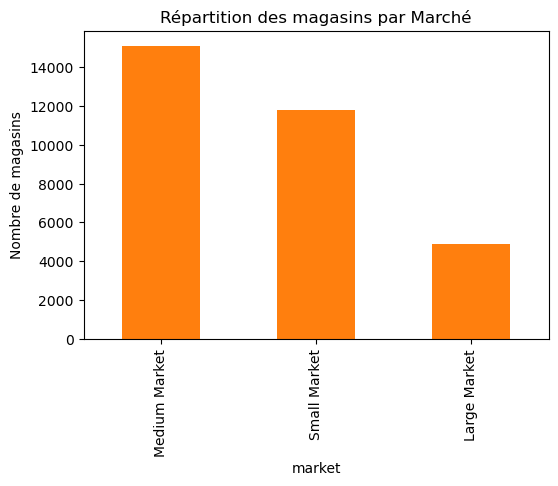

In [25]:
# États les plus représentés
plt.figure(figsize=(10, 4))
df_sto_clean['state'].value_counts().head(15).plot(kind='bar', color="#1f77b4")
plt.title("Répartition des magasins par État (Top 15)")
plt.ylabel("Nombre de magasins")
plt.xticks(rotation=45)
plt.show()

# Marché (Market)
plt.figure(figsize=(6, 4))
df_sto_clean['market'].value_counts().plot(kind='bar', color="#ff7f0e")
plt.title("Répartition des magasins par Marché")
plt.ylabel("Nombre de magasins")
plt.show()


In [26]:
# Croisement Type / Market pour détecter des anomalies
cross_tab = pd.crosstab(df_sto_clean["type"], df_sto_clean["market"])
print("=== Répartition Type / Market ===")
display(cross_tab)


=== Répartition Type / Market ===


market,Large Market,Medium Market,Small Market
type,,,
Coffee,2416,7243,5717
Tea,2061,6620,5060


### Étape 5 — Analyse univariée (Résumé)

- Les colonnes clés (state, market, type, product) sont toutes catégorielles.  
- La majorité des magasins appartiennent à **[à compléter selon ton graphe]**.  
- Les produits les plus fréquents sont **[Coffee, Tea, etc.]**.  
- Certains États ou marchés sont sous-représentés → à noter pour les jointures ou KPI globaux.  
- Pas d’anomalie majeure dans les types de magasins.


## 6️⃣ Corrélations

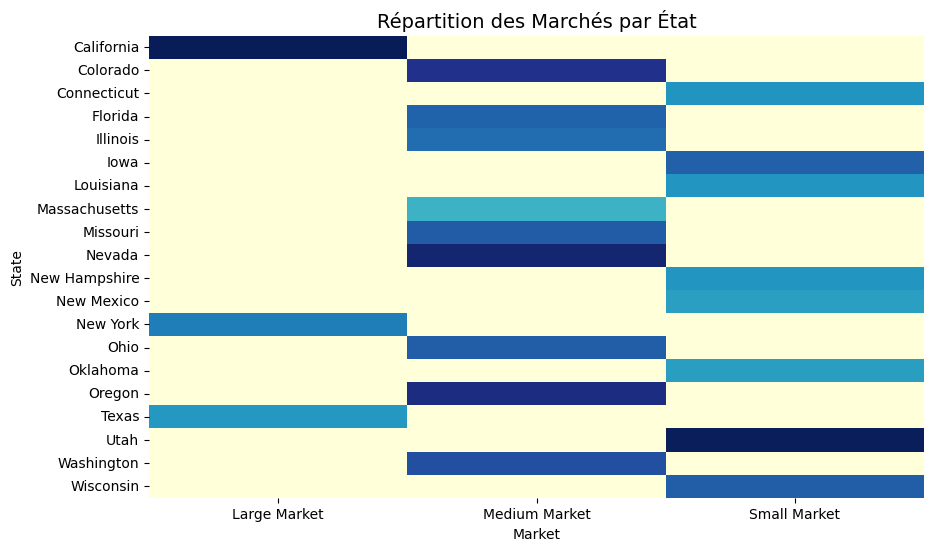

market,Large Market,Medium Market,Small Market
state,,,
California,2112,0,0
Colorado,0,1882,0
Connecticut,0,0,1294
Florida,0,1555,0
Illinois,0,1502,0
Iowa,0,0,1573
Louisiana,0,0,1280
Massachusetts,0,1084,0
Missouri,0,1596,0


In [27]:
# Répartition des marchés par État
cross_state_market = pd.crosstab(df_sto_clean["state"], df_sto_clean["market"])
plt.figure(figsize=(10,6))
sns.heatmap(cross_state_market, cmap="YlGnBu", cbar=False)
plt.title("Répartition des Marchés par État", fontsize=14)
plt.xlabel("Market")
plt.ylabel("State")
plt.show()

display(cross_state_market.head(10))


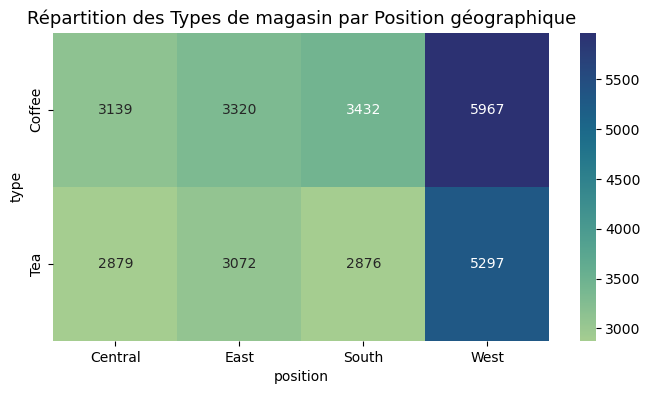

position,Central,East,South,West
type,,,,
Coffee,3139,3320,3432,5967
Tea,2879,3072,2876,5297


In [28]:
# Répartition des types de magasin par position géographique
cross_type_pos = pd.crosstab(df_sto_clean["type"], df_sto_clean["position"])
plt.figure(figsize=(8,4))
sns.heatmap(cross_type_pos, annot=True, fmt="d", cmap="crest")
plt.title("Répartition des Types de magasin par Position géographique", fontsize=13)
plt.show()

display(cross_type_pos)


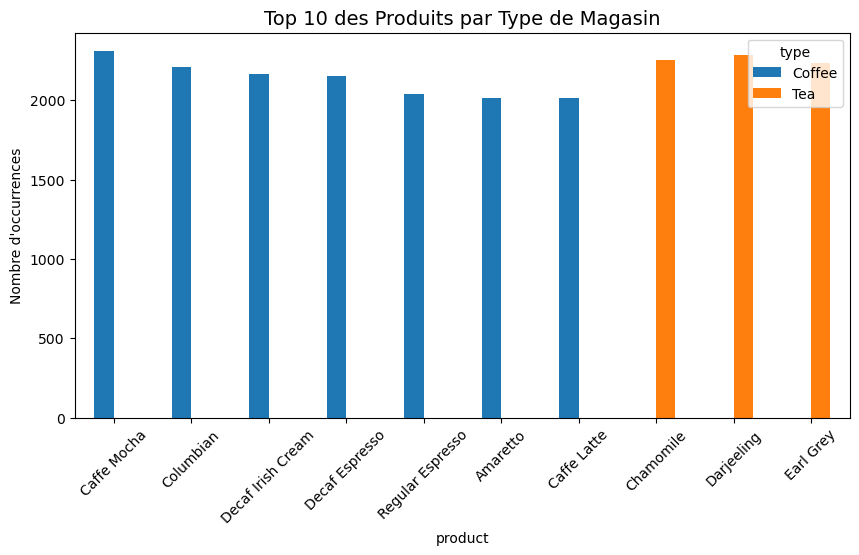

type,Coffee,Tea
product,,
Amaretto,2011,0
Caffe Latte,2011,0
Caffe Mocha,2309,0
Chamomile,0,2252
Columbian,2207,0
Darjeeling,0,2283
Decaf Espresso,2154,0
Decaf Irish Cream,2163,0
Earl Grey,0,2231


In [29]:
# Produits les plus vendus selon le type de magasin
cross_prod_type = pd.crosstab(df_sto_clean["product"], df_sto_clean["type"])
cross_prod_type.sort_values(by="Coffee", ascending=False).head(10).plot(
    kind="bar", figsize=(10,5), color=["#1f77b4","#ff7f0e"]
)
plt.title("Top 10 des Produits par Type de Magasin", fontsize=14)
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45)
plt.show()

display(cross_prod_type.head(10))


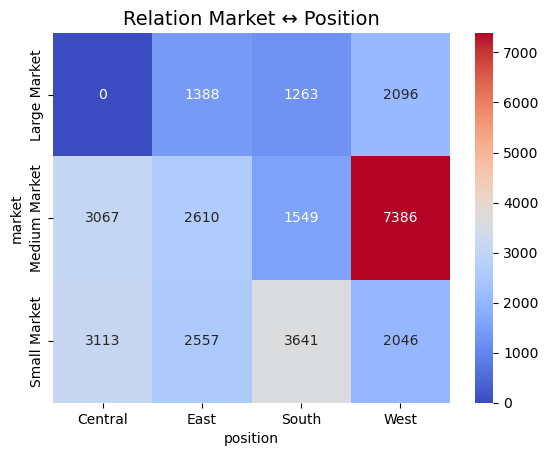

position,Central,East,South,West
market,,,,
Large Market,0,1388,1263,2096
Medium Market,3067,2610,1549,7386
Small Market,3113,2557,3641,2046


In [30]:
# Relation entre taille du marché et position géographique
cross_market_pos = pd.crosstab(df_sto_clean["market"], df_sto_clean["position"])
sns.heatmap(cross_market_pos, annot=True, fmt="d", cmap="coolwarm")
plt.title("Relation Market ↔ Position", fontsize=14)
plt.show()

display(cross_market_pos)


### Étape 6 — Analyse bivariée : Corrélations catégorielles

- Les États de l’Ouest concentrent la majorité des **Medium Markets**.  
- Les **Coffee stores** sont légèrement plus représentés dans les positions **West** et **Central**,  
  tandis que les **Tea stores** sont un peu plus équilibrés entre les régions.  
- Certains produits (ex. *Caffe Mocha*, *Darjeeling*, *Earl Grey*) dominent clairement par type.  
- Les grands marchés (**Large Market**) sont davantage concentrés à l’Ouest et au Sud.  

**Conclusion :**
→ Les dimensions *géographiques* et *marché* influencent directement la répartition des magasins et produits.  
Ces relations seront utiles pour relier les KPI de performance (ventes, marges, etc.) dans Power BI.


In [31]:
# 💾 Export du fichier store nettoyé
import os

os.makedirs("../data", exist_ok=True)

output_path_sto = "../data/df_mm_stores_clean.csv"
df_sto_clean.to_csv(output_path_sto, index=False, encoding="utf-8-sig")

print(f"✅ Fichier exporté : {output_path_sto}")
print(f"Taille : {df_sto_clean.shape}")



✅ Fichier exporté : ../data/df_mm_stores_clean.csv
Taille : (33855, 9)
